In [2]:
import torch
torch.__version__

'2.1.0'

In [1]:
import torch

# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


In [8]:
import torch
from yolact import Yolact
from data.config import set_cfg
import os 
os.environ["CUDA_VISIBLE_DEVICES"] = "3"
torch.cuda.set_device(3)

set_cfg('yolact_resnet101_safety_config')
model = Yolact()
dict = torch.load('weights/yolact_resnet101_safety_33_200000.pth', map_location=torch.device('cpu'))
model.load_state_dict(dict)

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
from eval import evalvideo

evalvideo(model, 'IP Camera1_23.10.06 1000_1100.avi', 'test_out.mp4')

ModuleNotFoundError: No module named 'torch'

In [ ]:
import cv2
from tqdm import tqdm

def cut_video(input_path, output_path, start_time, end_time):
    # 비디오 캡처 객체 생성
    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    # 비디오 프레임 속도 및 코덱 정보 가져오기
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    fourcc = cv2.VideoWriter_fourcc(*"H264")

    # 시작 및 종료 프레임 계산
    start_frame = int(start_time * fps)
    end_frame = int(end_time * fps)

    # 출력 비디오 설정
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    for _ in tqdm(range(start_frame, end_frame)):
        ret, frame = cap.read()
        if ret:
            out.write(frame)
        else:
            break

    cap.release()
    out.release()

# 사용 예
# input_video_path = "IP Camera2_1400_1500.avi"
input_video_path = "IP Camera2_1400_1500.avi"
output_video_path = "cut.mp4"
cut_video(input_video_path, output_video_path, start_time=0, end_time=600)  # 10초부터 20초까지 자르기


100%|██████████| 12000/12000 [06:39<00:00, 30.07it/s]


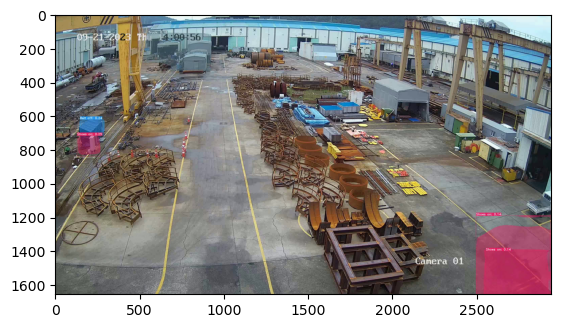

In [ ]:
import matplotlib.pyplot as plt
import cv2

video_path = './output.mp4'
cap = cv2.VideoCapture(video_path)
fourcc = int(cap.get(cv2.CAP_PROP_FOURCC))
fps = int(cap.get(cv2.CAP_PROP_FPS))
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
for _ in range(0, 10):
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame)
    break
